Recommendation systems are among the most popular applications of data science. They are used to predict the Rating or Preference that a user would give to an item.

Almost every major company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on auto play, and Facebook uses it to recommend pages to like and people to follow.

# Let’s Build our own recommendation system

In this Data Science project, you will see how to build a basic model of simple as well as content-based recommendation systems.

While these models will be nowhere close to the industry standard in terms of complexity, quality or accuracy, it will help you to get started with building more complex models that produce even better results.

# 1. Loading Data and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [2]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
print("Credits:",credits.shape)
print("Movies Dataframe:",movies.shape)

Credits: (4803, 4)
Movies Dataframe: (4803, 20)


# 2. Impute Missing Data and Clean Data

In [4]:
# First, we should merge two dataset toghether
credits_column_renamed = credits.rename(index=str, columns={"movie_id": "id"})
movies_merge = movies.merge(credits_column_renamed, on='id')
print(movies_merge.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [5]:
# And then droping unuseful columns
movies_cleaned = movies_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
print(movies_cleaned.head())
print(movies_cleaned.info())
print(movies_cleaned.head(1)['overview'])

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates

In [6]:
# Find Missing Ratio of Dataset
all_data_na = movies_cleaned.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
tagline,844
overview,3
runtime,2
release_date,1


In [7]:
movies_cleaned.dropna(subset=['overview'], inplace=True)

# 3. Analyzing

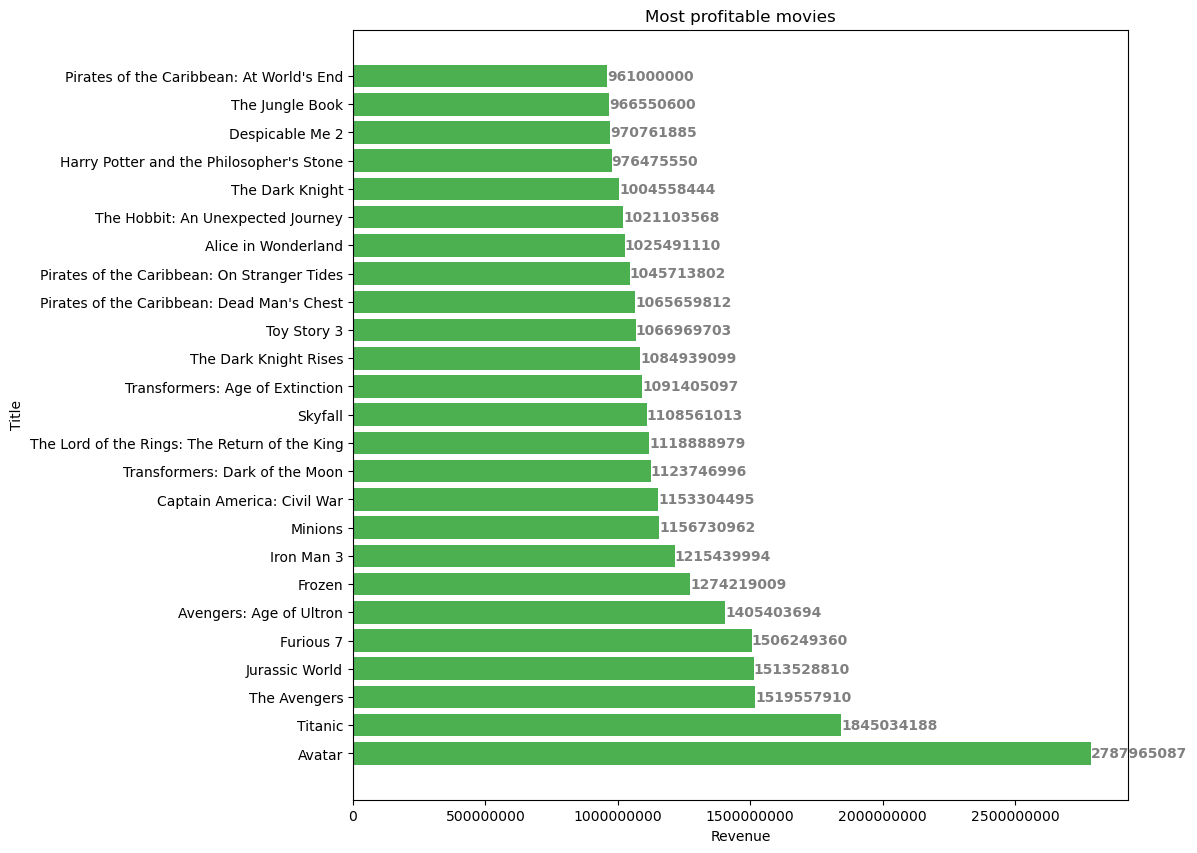

In [8]:
# The most profitable movies
rev_df = movies.loc[:, ['original_title', 'revenue']].sort_values(by=('revenue'), ascending=False)

fig, ax = plt.subplots(figsize =(10,10))
ax.barh(rev_df.original_title.head(25),
        rev_df.revenue.head(25),
        color="#4CAF50")

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.25,
             str(i.get_width()),
             fontsize = 10, fontweight ='bold',
             color ='grey')

plt.xlabel('Revenue')
plt.ylabel('Title')
plt.title('Most profitable movies')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# 4. Modeling and Predictions: Content Based Recommendation System
Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

In [10]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_cleaned['overview'])
print(tfv_matrix.shape)

  (0, 148)	0.30913566371756246
  (0, 1670)	0.2781535990843119
  (0, 431)	0.21084290341291434
  (0, 7055)	0.26867724841908824
  (0, 6447)	0.25667741877727707
  (0, 3582)	0.2178785202491359
  (0, 9393)	0.2414403528962384
  (0, 5907)	0.17991944361394235
  (0, 9717)	0.24435239113511664
  (0, 6543)	0.2959141439419381
  (0, 5972)	0.2747345275641027
  (0, 2634)	0.28189876819471266
  (0, 5658)	0.26104797828891285
  (0, 1514)	0.20118293309533966
  (0, 147)	0.30913566371756246
  (1, 1810)	0.3679407814456213
  (1, 7159)	0.3031047511907221
  (1, 2916)	0.30082286889432774
  (1, 9609)	0.33552276631817174
  (1, 2848)	0.2155618555572584
  (1, 2872)	0.3232521707896168
  (1, 4205)	0.3080323897734429
  (1, 5263)	0.13328606710757795
  (1, 1806)	0.21045468005671297
  (1, 2318)	0.2189172684598073
  :	:
  (4799, 671)	0.15980598144549593
  (4799, 2360)	0.15010628727202774
  (4799, 677)	0.13488940795750576
  (4799, 3736)	0.1485916649401138
  (4799, 3480)	0.14340214731962103
  (4799, 1252)	0.1517332030269128
  

In [11]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
print(sig[0])

[0.76163447 0.76159416 0.76159416 ... 0.76159416 0.76159416 0.76159416]


In [14]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_cleaned.index, index=movies_cleaned['original_title']).drop_duplicates()
print(indices)
print(indices['Newlyweds'])

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4800, dtype: int64
4799


In [15]:
def give_recomendations(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_cleaned['original_title'].iloc[movie_indices]

# Testing our content-based recommendation system with the seminal film Spy Kids

In [17]:
print(give_recomendations('Spy Kids'))

1541                 Toy Story
343                Toy Story 2
1779    The 40 Year Old Virgin
3379              Factory Girl
891            Man on the Moon
3873             Class of 1984
3065                Heartbeeps
4387      A LEGO Brickumentary
699             Daddy Day Care
2944          Army of Darkness
Name: original_title, dtype: object
